In [66]:
import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"]=14
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.transparent"] = False
plt.rcParams["axes.spines.right"]=False
plt.rcParams["axes.spines.top"]=False
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.1
plt.rcParams["axes.labelsize"] = 16

import seaborn as sns
sns.set_palette("deep")
import numpy as np
import pandas as pd
from permutation_helpers import random_data_gen

from scipy.stats import norm
def auc_from_maha(maha_dist: float):
    # source: https://en.wikipedia.org/wiki/Sensitivity_index#RMS_sd_discriminability_index
    auc = norm.cdf(maha_dist / np.sqrt(2))
    return auc

maha_values = np.linspace(0., 1.5, 5)

## 2D Mahalanobis distance

In [2]:
np.linspace(0., 1.875, 6)[::2]

array([0.  , 0.75, 1.5 ])

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


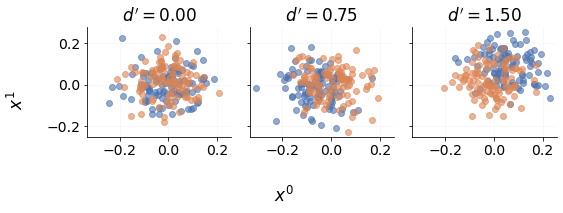

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3), sharey=True, sharex=True)
ax = ax.ravel()
for i, m in enumerate(np.linspace(0., 1.875, 6)[::2]):
    X, y = random_data_gen(n_samples=200, n_feats=2, maha=m)
    ax[i].scatter(X[y, 0], X[y, 1], alpha=.6)
    ax[i].scatter(X[~y, 0], X[~y, 1], alpha=.6)
    ax[i].set_title(f"$d'={m:.2f}$")
fig.supxlabel(r"$x^0$")
fig.supylabel(r"$x^1$")
plt.tight_layout()
plt.savefig("figures/2D_maha_viz.pdf", bbox_inches="tight")

## Load Simulation Data

In [4]:
testsize = None
for m in maha_values.round(2):
    testsize_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_testsize_post.pkl")
    testsize_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_testsize_pre.pkl")
    testsize_pre['test'] = "pre"; testsize_post['test'] = "post"
    testsize_pre['d'] = m; testsize_post['d'] = m
    testsize = pd.concat([testsize, testsize_pre, testsize_post])
testsize = testsize.reset_index(drop=True)
testsize['positive'] = testsize['pval']<=.05
testsize['param'] = testsize['param'].round(3)

samplesize = None
for m in maha_values.round(2):
    samplesize_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_samplesize_post.pkl")
    samplesize_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_samplesize_pre.pkl")
    samplesize_pre['test'] = "pre"; samplesize_post['test'] = "post"
    samplesize_pre['d'] = m; samplesize_post['d'] = m
    samplesize = pd.concat([samplesize, samplesize_pre, samplesize_post])
samplesize = samplesize.reset_index(drop=True)
samplesize['positive'] = samplesize['pval']<=.05
samplesize['param'] = samplesize['param'].round(3)

nfeats = None
for m in maha_values.round(2):
    nfeats_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_nfeats_post.pkl")
    nfeats_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_nfeats_pre.pkl")
    nfeats_pre['test'] = "pre"; nfeats_post['test'] = "post"
    nfeats_pre['d'] = m; nfeats_post['d'] = m
    nfeats = pd.concat([nfeats, nfeats_pre, nfeats_post])
nfeats = nfeats.reset_index(drop=True)
nfeats['positive'] = nfeats['pval']<=.05
nfeats['param'] = nfeats['param'].round(3)

ratio = None
for m in maha_values.round(2):
    ratio_post = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_ratio_post.pkl")
    ratio_pre = pd.read_pickle(f"sim_results/maha_{m:.1f}/simulate_ratio_pre.pkl")
    ratio_pre['test'] = "pre"; ratio_post['test'] = "post"
    ratio_pre['d'] = m; ratio_post['d'] = m
    ratio = pd.concat([ratio, ratio_pre, ratio_post])
ratio = ratio.reset_index(drop=True)
ratio['positive'] = ratio['pval']<=.05
ratio['param'] = ratio['param'].round(3)

# Power

## Test/Train Split

In [30]:
from matplotlib.colors import LogNorm

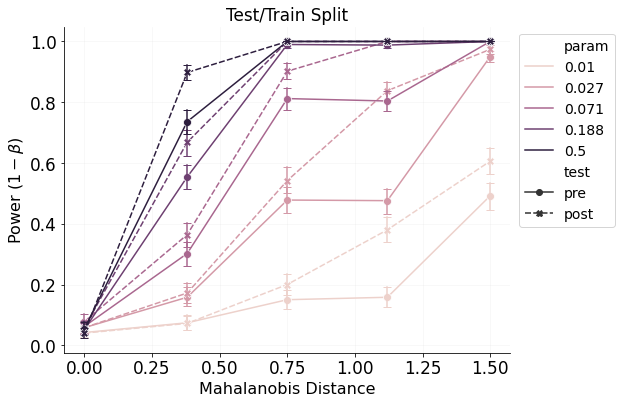

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=testsize, x='d', y='positive', hue='param', hue_norm=LogNorm(),style='test', 
                  markers=True, markersize=8, err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize='large')
ax.set_title("Test/Train Split")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/test-train-split-power.pdf", bbox_inches='tight')

## Sample Size

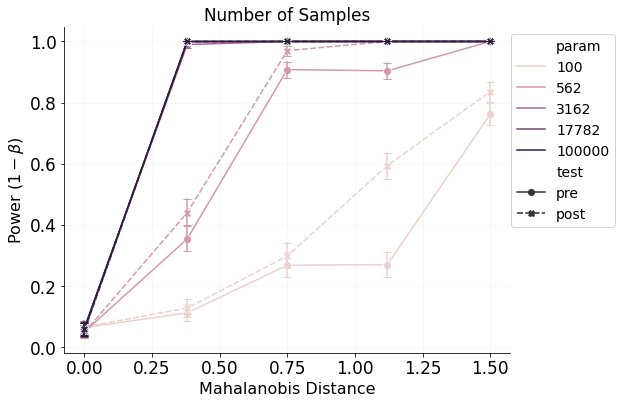

In [47]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=samplesize, x='d', y='positive', hue='param', hue_norm=LogNorm(), style='test',
                  markers=True, markersize=8, err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize='large')
ax.set_title("Number of Samples")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/samplesize-power.pdf", bbox_inches='tight')

## Number of Features

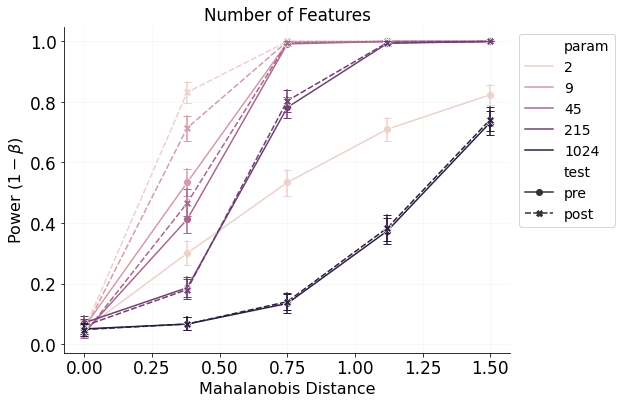

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=nfeats, x='d', y='positive', hue='param', hue_norm=LogNorm(), style='test', 
                  markers=True, markersize=8, err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize='large')
ax.set_title("Number of Features")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/nfeats-power.pdf", bbox_inches='tight')

## Class Balance Ratio

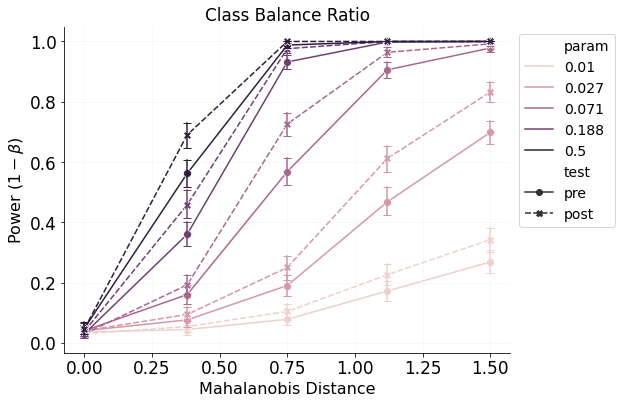

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=ratio, x='d', y='positive', hue='param', hue_norm=LogNorm(), style='test', 
                  markers=True, markersize=8, err_style="bars", err_kws={"capsize":4})
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
ax.tick_params(labelsize='large')
ax.set_title("Class Balance Ratio")
ax.set_xlabel(r"Mahalanobis Distance")
ax.set_ylabel(r"Power ($1-\beta$)")
plt.savefig("figures/ratio-power.pdf", bbox_inches='tight')

# Bias

## Test/Train Split

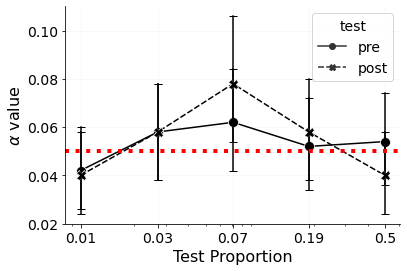

In [24]:
null_testsize = testsize.query("d==0.")
ax = sns.lineplot(data=null_testsize, x="param", y="positive", style='test', markers=True, markersize=10, color='k', err_style="bars", err_kws={"capsize":4})
ax.axhline(.05, color='red', ls=':', lw=4)
plt.xscale("log")
plt.xticks(null_testsize["param"].unique(), null_testsize["param"].unique().round(2))
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"Test Proportion")
plt.savefig("figures/test-train-split-bias.pdf", bbox_inches='tight')

## Sample Size

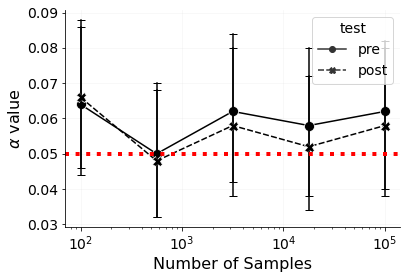

In [25]:
null_samplesize = samplesize.query("d==0.")
ax = sns.lineplot(data=null_samplesize, x="param", y="positive", style='test', markers=True, markersize=10, color='k', err_style="bars", err_kws={"capsize":4})
ax.axhline(.05, color='red', ls=':', lw=4)
plt.xscale("log")
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"Number of Samples")
plt.savefig("figures/samplesize-bias.pdf", bbox_inches='tight')

## Number of Features

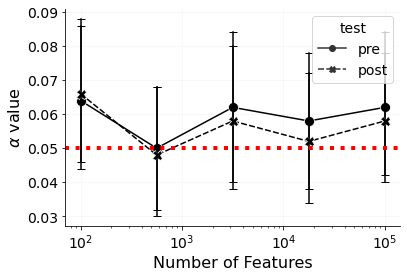

In [26]:
null_nfeats = nfeats.query("d==0.")
ax = sns.lineplot(data=null_samplesize, x="param", y="positive", style='test', markers=True, markersize=10, color='k', err_style="bars", err_kws={"capsize":4})
ax.axhline(.05, color='red', ls=':', lw=4)
plt.xscale("log")
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"Number of Features")
plt.savefig("figures/nfeats-bias.pdf", bbox_inches='tight')

## Class Balance Ratio

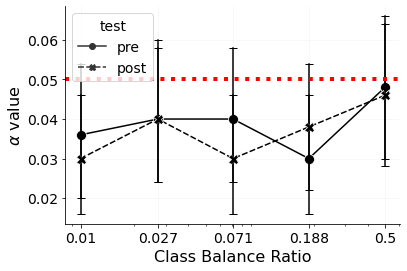

In [27]:
null_ratio = ratio.query("d==0.")
ax = sns.lineplot(data=null_ratio, x="param", y="positive", style='test', markers=True, markersize=10, color='k',
                  err_style="bars", err_kws={"capsize":4})
ax.axhline(.05, color='red', ls=':', lw=4)
plt.xscale("log")
ax.set_xticks(null_ratio['param'].unique())
ax.set_xticklabels(null_ratio['param'].unique())
plt.ylabel(r"$\alpha$ value")
plt.xlabel(r"Class Balance Ratio")
plt.savefig("figures/ratio-bias.pdf", bbox_inches='tight')

# Runtime analysis

In [71]:
runtime = pd.read_pickle("sim_results/simulate_runtime.pkl").reset_index()

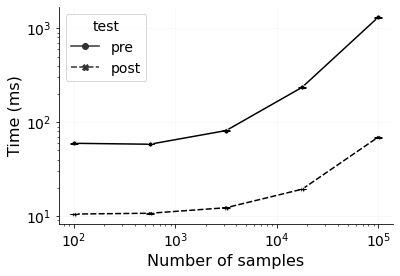

In [72]:
ax = sns.lineplot(data=runtime, x="param", y="value", style='test', markers=True, markersize=5, color='k',
                  err_style="bars", err_kws={"capsize":4})
ax.set_xlabel("Number of samples")
ax.set_ylabel("Time (ms)")
plt.xscale("log")
plt.yscale("log")
plt.savefig("figures/runtime.pdf", bbox_inches='tight')

# Are we over-fitting or under-fitting?

In [65]:
maha = samplesize.query("param==100")
expected_auc = auc_from_maha(np.unique(maha["d"]))

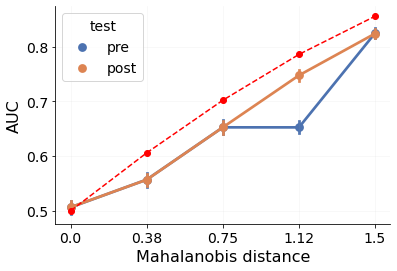

In [66]:
ax = sns.pointplot(data=maha, x="d", y="score", hue='test', label="Actual AUC")
ax.plot(expected_auc, color='red', ls='--', marker='o', label = "Expected AUC")
ax.set_xlabel("Mahalanobis distance")
ax.set_ylabel("AUC")
plt.grid(True, alpha=0.1)
# plt.legend()
# sns.pointplot(data=null_scores, x="param", y="mean")

In [24]:
import time

In [25]:
time.strftime("%m%d%y_%H:%M")

'032023_14:25'

In [ ]:
samplesize